# Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

housingDetails = pd.read_csv("train.csv", encoding = 'UTF8')
housingDetails.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#verifying the data types
housingDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#check the shape of the dataset

housingDetails.shape

(1460, 81)

In [5]:
# Descriptive Statistics

housingDetails.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Check for null values

housingDetails.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
#most of the Alley values has NAN, Replace with value No Alley Access
housingDetails['Alley'].replace({np.nan:'No Alley Access'},inplace=True)

#check the percentage of data is No Alley access

100*(housingDetails['Alley'].value_counts()/housingDetails['Alley'].count())

No Alley Access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64

In [8]:
# 93.77% values has No Alley Access. This can be considered as a single value attribute and hence can be dropped

housingDetails=housingDetails.drop(['Alley'],axis=1)

In [9]:
#Clean up the Variable bsmntqual
housingDetails['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)

In [10]:
#Checking the percentage distribution of data for bsmntqual
100*(housingDetails['BsmtQual'].value_counts()/housingDetails['BsmtQual'].count())

TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: BsmtQual, dtype: float64

In [11]:
#verifying the BsmtCond (Replacing NA => No Basement)
housingDetails['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
100*(housingDetails['BsmtCond'].value_counts()/housingDetails['BsmtCond'].count())

TA             89.794521
Gd              4.452055
Fa              3.082192
No Basement     2.534247
Po              0.136986
Name: BsmtCond, dtype: float64

In [12]:
# As 89.794% of BsmtCond is "Typical - slight dampness allowed" it can be considered as a single value attribute and hence can be dropped
housingDetails=housingDetails.drop(['BsmtCond'],axis=1)

In [13]:
# Cleaning the feature BsmtExposure
housingDetails['BsmtExposure'].replace({np.nan:'No Basement'}, inplace=True)
100*(housingDetails['BsmtExposure'].value_counts()/housingDetails['BsmtExposure'].count())

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64

In [14]:
# grouping the basement exposer feature to 3 levels to get the considerable values

housingDetails['BsmtExposure'].replace({'No':'Noorbelowavg'},inplace=True)
housingDetails['BsmtExposure'].replace({'Mn':'Noorbelowavg'},inplace=True)
housingDetails['BsmtExposure'].replace({'Gd':'Avgoraboveavg'},inplace=True)
housingDetails['BsmtExposure'].replace({'Av':'Avgoraboveavg'},inplace=True)
100*(housingDetails['BsmtExposure'].value_counts()/housingDetails['BsmtExposure'].count())

Noorbelowavg     73.082192
Avgoraboveavg    24.315068
No Basement       2.602740
Name: BsmtExposure, dtype: float64

In [15]:
# cleaning the BsmtFinType1 feature by relacing the NA to No Basement

housingDetails['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
100*(housingDetails['BsmtFinType1'].value_counts()/housingDetails['BsmtFinType1'].count())

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64

In [16]:
# cleaning the BsmtFinType2 feature by relacing the NA to No Basement

housingDetails['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
100*(housingDetails['BsmtFinType2'].value_counts()/housingDetails['BsmtFinType2'].count())

Unf            86.027397
Rec             3.698630
LwQ             3.150685
No Basement     2.602740
BLQ             2.260274
ALQ             1.301370
GLQ             0.958904
Name: BsmtFinType2, dtype: float64

In [17]:
# Unf = Unfinshed has the more value 86% approx in the fewature BsmtFinType2. It seems to be a single value attribute and this can be dropped

housingDetails=housingDetails.drop(['BsmtFinType2'],axis=1)

In [18]:
#Let us study more on the basement to elimnate insignificant variables
housingDetails_Basement=housingDetails[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

<Figure size 1440x720 with 0 Axes>

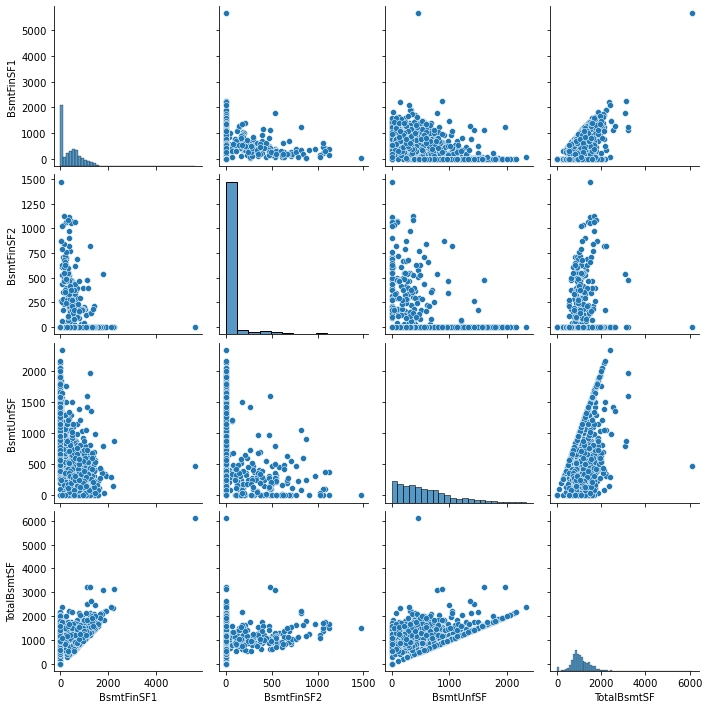

In [19]:
# Explore more on the basement attributes using a Scatter plot 

plt.figure(figsize=(20,10))
sns.pairplot(housingDetails_Basement)
plt.show()

In [20]:
# TotalBsmtSF feature is highly correlated with the other feature. So dropping the remaining features from the data set

housingDetails=housingDetails.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

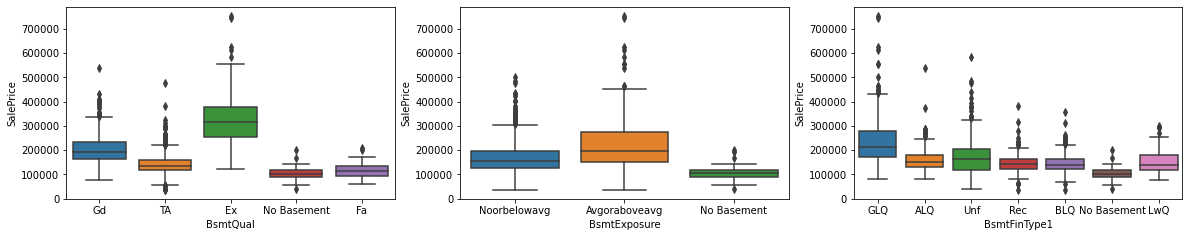

In [21]:
# Validate further on the Basement related catagorical variables to check the correlation to decide which feature is being used

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housingDetails)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housingDetails)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = housingDetails)

In [22]:
#BsmtFinType1 has less impact on the salePrice. So dropping this deature

housingDetails=housingDetails.drop(['BsmtFinType1'],axis=1)

In [23]:
# validate the feature FirePlaceQu as it has lot of missing values

housingDetails['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
# Grouping the FireplaceQu feature to get it in better categorical level

housingDetails['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
housingDetails['FireplaceQu'].replace({'Gd':'Above Avg Fireplace'},inplace=True)
housingDetails['FireplaceQu'].replace({'Ex':'Above Avg Fireplace'},inplace=True)
housingDetails['FireplaceQu'].replace({'TA':'Avg or below Fireplace'},inplace=True)
housingDetails['FireplaceQu'].replace({'Po':'Avg or below Fireplace'},inplace=True)
housingDetails['FireplaceQu'].replace({'Fa':'Avg or below Fireplace'},inplace=True)
100*(housingDetails['FireplaceQu'].value_counts()/housingDetails['FireplaceQu'].count())

No Fireplace              47.260274
Above Avg Fireplace       27.671233
Avg or below Fireplace    25.068493
Name: FireplaceQu, dtype: float64

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

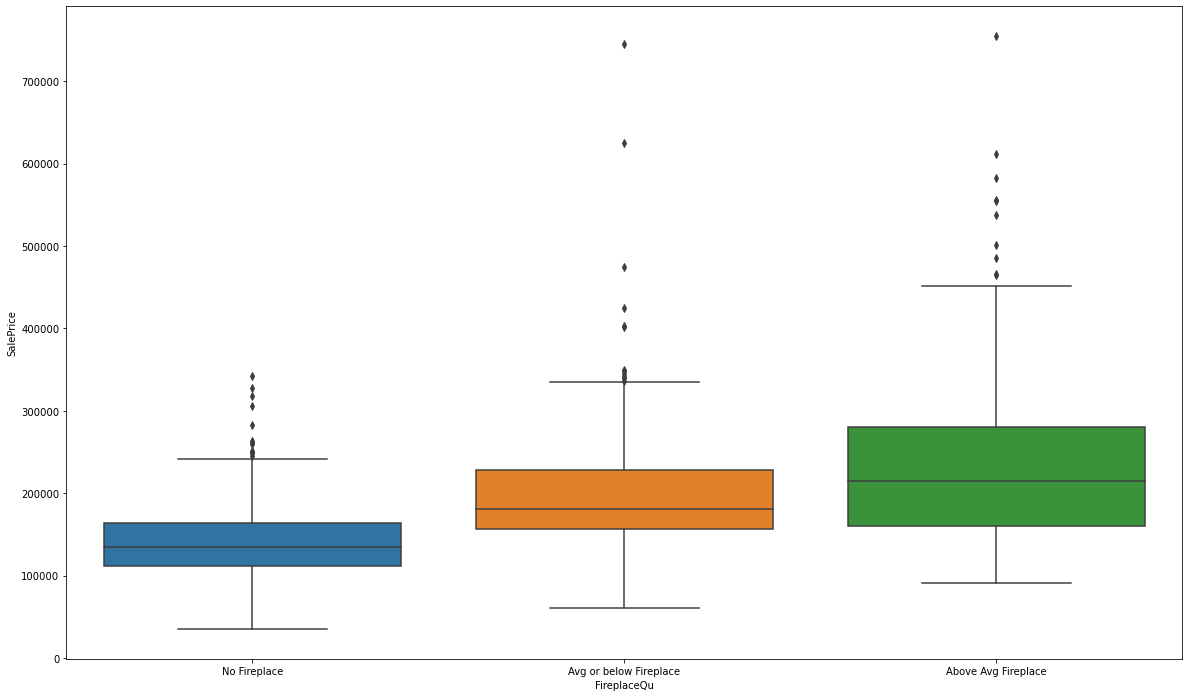

In [25]:
# Ploting the FireplaceQu feature against SalePrice to see the impact

plt.figure(figsize=(20, 12))
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housingDetails)

The above Box plot shows that the FireplaceQu feature has significant impact on the SalesPrice

In [26]:
# let us take the GarageType feature for the further analysis

housingDetails['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(housingDetails['GarageType'].value_counts()/housingDetails['GarageType'].count())

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

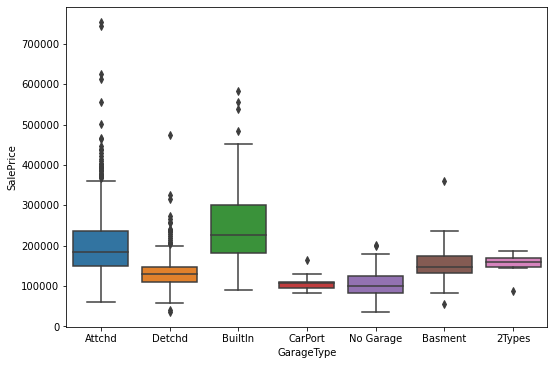

In [27]:
#Plotting the categorical variable GarageType and checking correlation with SalePrice
plt.figure(figsize=(50, 20))
plt.subplot(3,5,6)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housingDetails)

Attached and Builtin Garage Types have higher SalePrice

In [28]:
# Let us reduce the levels
housingDetails['GarageType'].replace({'CarPort':'Avg Garage'},inplace=True)
housingDetails['GarageType'].replace({'Basment':'Avg Garage'},inplace=True)
housingDetails['GarageType'].replace({'2Types':'Avg Garage'},inplace=True)
housingDetails['GarageType'].replace({'Detchd':'Avg Garage'},inplace=True)
100*(housingDetails['GarageType'].value_counts()/housingDetails['GarageType'].count())

Attchd        59.589041
Avg Garage    28.835616
BuiltIn        6.027397
No Garage      5.547945
Name: GarageType, dtype: float64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

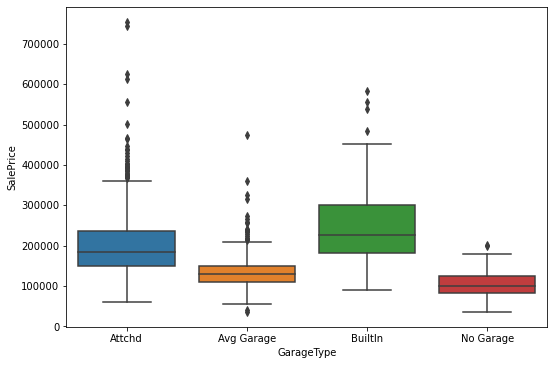

In [29]:
#Plotting the categorical variable GarageType and checking correlation with SalePrice
plt.figure(figsize=(50, 20))
plt.subplot(3,5,6)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housingDetails)

In [30]:
#Cleaning up variable GarageFinish (Replacing NA => No Garage)
housingDetails['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(housingDetails['GarageFinish'].value_counts()/housingDetails['GarageFinish'].count())

Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

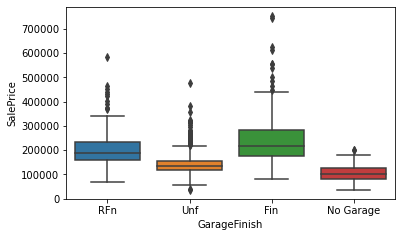

In [31]:
#Plotting the categorical variable GarageFinish to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housingDetails)

Finished and Rough Finished have higher SalePrice

In [32]:
# let us analyse and clean up the feature GarageQual

housingDetails['GarageQual'].replace({np.nan:'No Garage'},inplace=True)
(100*(housingDetails['GarageQual'].value_counts()/housingDetails['GarageQual'].count()))

TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Ex            0.205479
Po            0.205479
Name: GarageQual, dtype: float64

In [33]:
# TA (Typical / Average) category has 89.79% of the values. Hence dropping this column considering this as single value attribute

housingDetails=housingDetails.drop(['GarageQual'],axis=1)

In [34]:
#Cleaning up variable GarageCond (Replacing NA => No Garage)
housingDetails['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
print(100*(housingDetails['GarageCond'].value_counts()/housingDetails['GarageCond'].count()))

TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64


<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

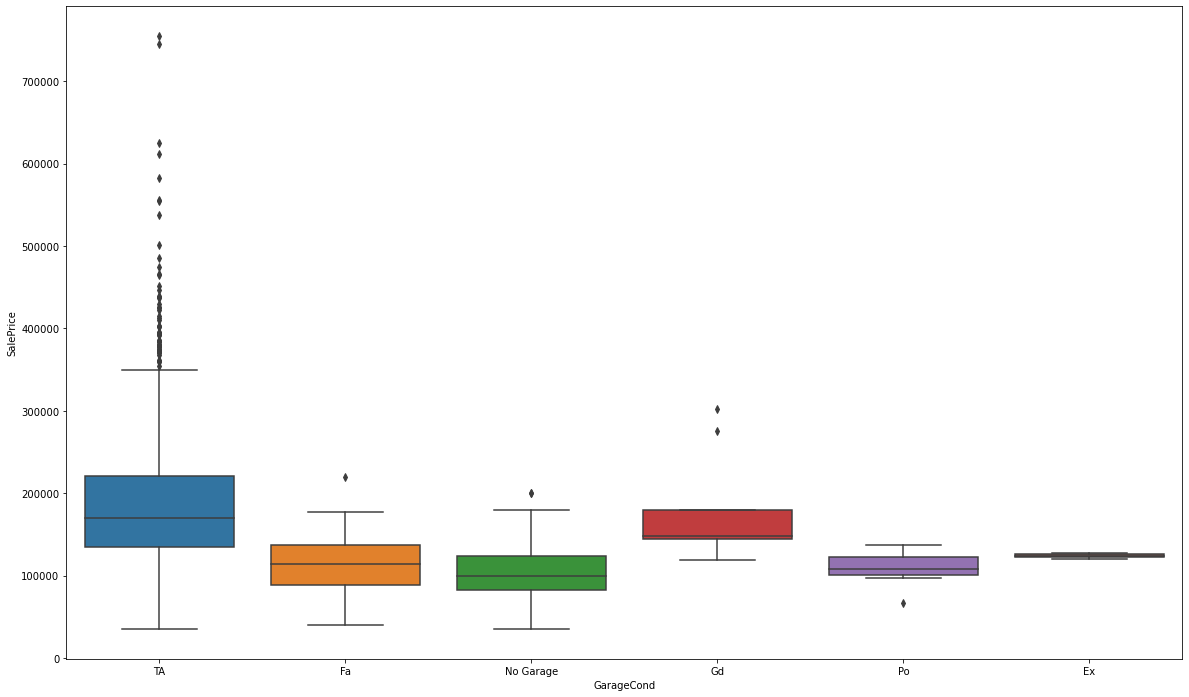

In [35]:
#Plotting the categorical variable GarageCond to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housingDetails)


SalesPrice of the house is having higher vaues when the garage is good and above condition. So we can consider this column for model

In [36]:
#Cleaning up variable PoolQC (Replacing NA => No Pool)
housingDetails['PoolQC'].replace({np.nan:'No Pool'},inplace=True)
print(100*(housingDetails['PoolQC'].value_counts()/housingDetails['PoolQC'].count()))

No Pool    99.520548
Gd          0.205479
Ex          0.136986
Fa          0.136986
Name: PoolQC, dtype: float64


<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

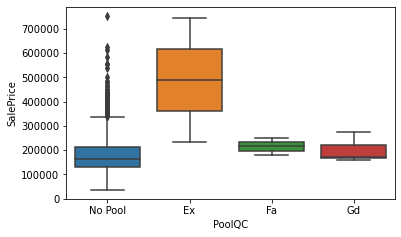

In [37]:
#Plotting the categorical variable GarageCond to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = housingDetails)

Houses with Excelling Pool Quality having soaringly high prices

In [38]:
# We can however drop this variable as 99% of the data has no pool and excellent pool quality recrods might be majorly in outlier area
#it can be considered as a single value attribute and hence can be dropped
housingDetails=housingDetails.drop(['PoolQC'],axis=1)

In [39]:
#Cleaning up variable Fence (Replacing NA => No Fence)
housingDetails['Fence'].replace({np.nan:'No Fence'},inplace=True)
print(100*(housingDetails['Fence'].value_counts()/housingDetails['Fence'].count()))

No Fence    80.753425
MnPrv       10.753425
GdPrv        4.041096
GdWo         3.698630
MnWw         0.753425
Name: Fence, dtype: float64


In [40]:
# Lets convert this to a variable as Fence yes or no
#Imputing level values of Fence
housingDetails['Fence'].replace({'MnPrv':'Fenced'},inplace=True)
housingDetails['Fence'].replace({'GdPrv':'Fenced'},inplace=True)
housingDetails['Fence'].replace({'GdWo':'Fenced'},inplace=True)
housingDetails['Fence'].replace({'MnWw':'Fenced'},inplace=True)
print(100*(housingDetails['Fence'].value_counts()/housingDetails['Fence'].count()))

No Fence    80.753425
Fenced      19.246575
Name: Fence, dtype: float64


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

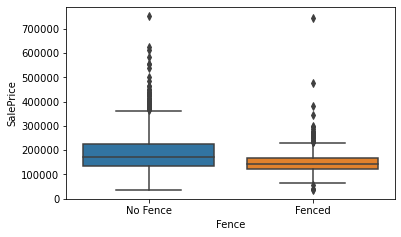

In [41]:
#Plotting the categorical variable Fence to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = housingDetails)

We dont see significant difference between the Fenced and No Fence however No Fence homes has higher sales price than the Fenced one.

In [42]:
#Cleaning up variable MiscFeature (Replacing NA => No Fence)
housingDetails['MiscFeature'].replace({np.nan:'None'},inplace=True)
100*(housingDetails['MiscFeature'].value_counts()/housingDetails['MiscFeature'].count())

None    96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

In [43]:
#Dropping the above feature as96% of the data does not have any misc feature
housingDetails=housingDetails.drop(['MiscFeature'],axis=1)

In [44]:
#Taking a deep dive into the Porch related attributes to understand the correlations
housingDetails_Porch=housingDetails[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]

<Figure size 1440x720 with 0 Axes>

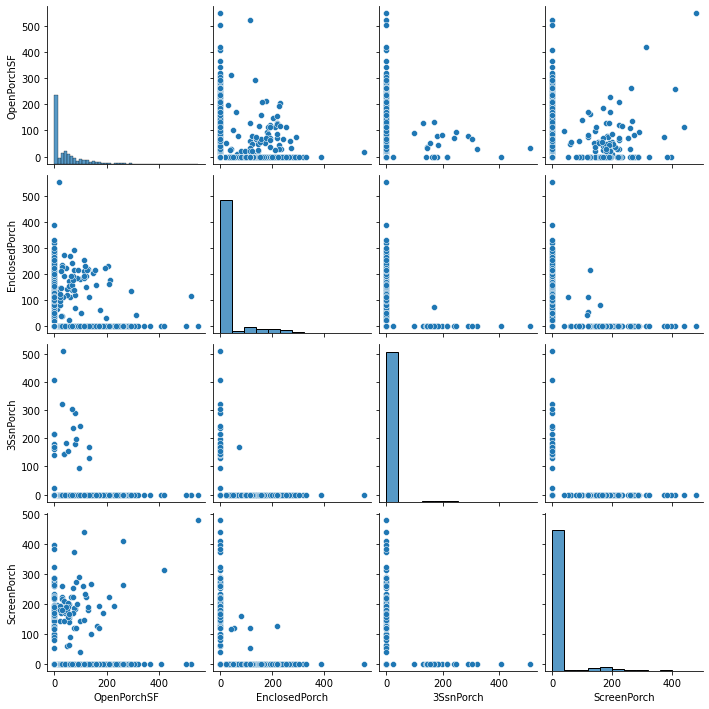

In [45]:
# pairwise scatter plot for porch related fields
plt.figure(figsize=(20, 10))
sns.pairplot(housingDetails_Porch)
plt.show()

In [46]:
#From the correlation pairplots, Out of four variables on Porch, we can capture multicollinearity exists from Open Porch and Enclosed Porch
housingDetails=housingDetails.drop(['ScreenPorch','3SsnPorch'],axis=1)

In [47]:
#Check on the Neighborhood field
print(100*(housingDetails['Neighborhood'].astype('category').value_counts()/housingDetails['Neighborhood'].count()))

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64


In [48]:
#Imputing values of the minor category levels in Neighborhood
housingDetails['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housingDetails['Neighborhood'].replace({'Blueste':'Others'},inplace=True)
print(100*(housingDetails['Neighborhood'].astype('category').value_counts()/housingDetails['Neighborhood'].count()))

NAmes      15.410959
CollgCr    10.273973
Others     10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
Name: Neighborhood, dtype: float64


In [49]:
#Let us check on the YearBuilt Variable
print(100*(housingDetails['YearBuilt'].value_counts()/housingDetails['YearBuilt'].count()))

2006    4.589041
2005    4.383562
2004    3.698630
2007    3.356164
2003    3.082192
          ...   
1875    0.068493
1911    0.068493
1917    0.068493
1872    0.068493
1905    0.068493
Name: YearBuilt, Length: 112, dtype: float64


In [50]:
#Binning of the Year built variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1925,1950,1976,1991,2001,2010]
slot_names=['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
housingDetails['YearBuilt']=pd.cut(housingDetails['YearBuilt'],bins,labels=slot_names,include_lowest=True)
100*(housingDetails['YearBuilt'].value_counts()/housingDetails['YearBuilt'].count())

1950-1975    31.027397
2001-2010    23.561644
1991-2000    13.013699
1925-1950    12.054795
1872-1925    11.095890
1976-1990     9.246575
Name: YearBuilt, dtype: float64

In [51]:
#Binning of the YearRemodAdd variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1950,1976,1991,2001,2010]
slot_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
housingDetails['YearRemodAdd']=pd.cut(housingDetails['YearRemodAdd'],bins,labels=slot_names,include_lowest=True)
100*(housingDetails['YearRemodAdd'].value_counts()/housingDetails['YearRemodAdd'].count())

2001-2010    32.602740
1950-1975    24.041096
1991-2000    20.000000
1872-1950    12.191781
1976-1990    11.164384
Name: YearRemodAdd, dtype: float64

In [52]:
#Converting the binned year columns as object datatype
housingDetails['YearBuilt']=housingDetails['YearBuilt'].values.astype(np.object)
housingDetails['YearRemodAdd']=housingDetails['YearRemodAdd'].values.astype(np.object)

In [53]:
#Cleaning up variable LotFrontage (Replacing NA => 0)
housingDetails['LotFrontage'].replace({np.nan:'0'},inplace=True)
housingDetails['LotFrontage']=housingDetails['LotFrontage'].values.astype(np.int64)
100*(housingDetails['LotFrontage'].value_counts()/housingDetails['LotFrontage'].count())


0      17.739726
60      9.794521
70      4.794521
80      4.726027
50      3.904110
         ...    
137     0.068493
38      0.068493
33      0.068493
150     0.068493
46      0.068493
Name: LotFrontage, Length: 111, dtype: float64

In [54]:
#MasVnrArea: Masonry veneer area in square feet
100*(housingDetails['MasVnrType'].astype('category').value_counts()/housingDetails['MasVnrType'].count())

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

In [55]:
#Let us drop grgeyearbuilt as it is same as year built
housingDetails=housingDetails.drop(['GarageYrBlt'],axis=1)

In [56]:
#Replacing missing value with Unknown for in the feature Electrical
housingDetails['Electrical'].replace({np.nan:'Unknown'},inplace=True)
print(100*(housingDetails['Electrical'].value_counts()/housingDetails['Electrical'].count()))
#Imputing the minor category levels of Electrical
housingDetails['Electrical'].replace({'FuseA':'Other'},inplace=True)
housingDetails['Electrical'].replace({'FuseF':'Other'},inplace=True)
housingDetails['Electrical'].replace({'FuseP':'Other'},inplace=True)
housingDetails['Electrical'].replace({'Mix':'Other'},inplace=True)
housingDetails['Electrical'].replace({'Unknown':'Other'},inplace=True)
print(100*(housingDetails['Electrical'].value_counts()/housingDetails['Electrical'].count()))

SBrkr      91.369863
FuseA       6.438356
FuseF       1.849315
FuseP       0.205479
Mix         0.068493
Unknown     0.068493
Name: Electrical, dtype: float64
SBrkr    91.369863
Other     8.630137
Name: Electrical, dtype: float64


In [57]:
#Check for  percentage of missing values for columns
round(housingDetails.isnull().sum()/len(housingDetails.index), 2)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 68, dtype: float64

In [58]:
#Drop rows with missing values if any
housingDetails=housingDetails.dropna(how='any',axis=0)

In [59]:
housingDetails.nunique().sort_values(ascending =True)

Fence             2
Street            2
Electrical        2
CentralAir        2
Utilities         2
               ... 
TotalBsmtSF     717
1stFlrSF        749
GrLivArea       858
LotArea        1067
Id             1452
Length: 68, dtype: int64

In [60]:
housingDetails.shape

(1452, 68)

In [61]:
# all numeric (float and int) variables in the dataset
housingDetails_numeric = housingDetails.select_dtypes(include=['float64', 'int64'])
housingDetails_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65,8450,7,5,196.0,856,856,854,...,2,548,0,61,0,0,0,2,2008,208500
1,2,20,80,9600,6,8,0.0,1262,1262,0,...,2,460,298,0,0,0,0,5,2007,181500
2,3,60,68,11250,7,5,162.0,920,920,866,...,2,608,0,42,0,0,0,9,2008,223500
3,4,70,60,9550,7,5,0.0,756,961,756,...,3,642,0,35,272,0,0,2,2006,140000
4,5,60,84,14260,8,5,350.0,1145,1145,1053,...,3,836,192,84,0,0,0,12,2008,250000


30 features are having numerical values including Id column. Lets drop the Id column

In [62]:
# dropping ID column 
housingDetails_numeric = housingDetails_numeric.drop(['Id'], axis=1)
housingDetails_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65,8450,7,5,196.0,856,856,854,0,...,2,548,0,61,0,0,0,2,2008,208500
1,20,80,9600,6,8,0.0,1262,1262,0,0,...,2,460,298,0,0,0,0,5,2007,181500
2,60,68,11250,7,5,162.0,920,920,866,0,...,2,608,0,42,0,0,0,9,2008,223500
3,70,60,9550,7,5,0.0,756,961,756,0,...,3,642,0,35,272,0,0,2,2006,140000
4,60,84,14260,8,5,350.0,1145,1145,1053,0,...,3,836,192,84,0,0,0,12,2008,250000


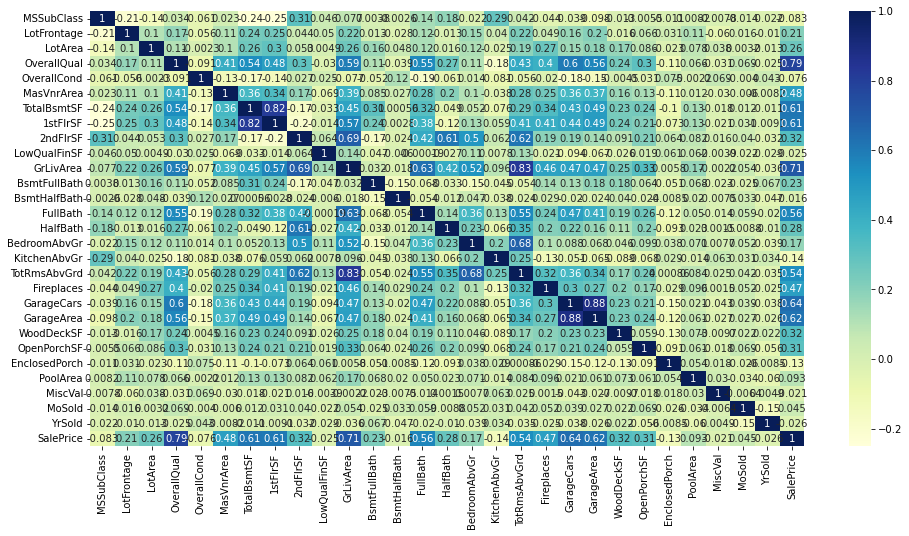

In [63]:
# correlation matrix
cor = housingDetails_numeric.corr()
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [64]:
X = housingDetails.loc[:, ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities',
                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                    'OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure','TotalBsmtSF','Heating','HeatingQC',
                    'CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                    'FireplaceQu','GarageType','GarageFinish','GarageCars','GarageArea','GarageCond','PavedDrive',
                    'WoodDeckSF','OpenPorchSF','EnclosedPorch','PoolArea','Fence',
                    'MiscVal','MoSold','YrSold','SaleType','SaleCondition']]
y = housingDetails['SalePrice']

In [65]:
# creating dummy variables for categorical variables

# subset all categorical variables
housingDetails_categorical = X.select_dtypes(include=['object'])
housingDetails_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,No Fireplace,Attchd,RFn,TA,Y,No Fence,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Others,Feedr,Norm,...,TA,Typ,Avg or below Fireplace,Attchd,RFn,TA,Y,No Fence,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Avg or below Fireplace,Attchd,RFn,TA,Y,No Fence,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Above Avg Fireplace,Avg Garage,Unf,TA,Y,No Fence,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Avg or below Fireplace,Attchd,RFn,TA,Y,No Fence,WD,Normal


In [66]:
# convert categorical variables into dummies
housingDetails_dummies = pd.get_dummies(housingDetails_categorical, drop_first=True)
housingDetails_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [67]:
# drop categorical variables 
X = X.drop(list(housingDetails_categorical.columns), axis=1)

In [68]:
# concat dummy variables with X
X = pd.concat([X, housingDetails_dummies], axis=1)

In [69]:
X.shape

(1452, 206)

In [70]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=206)

In [71]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [72]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.131320,0.011929,0.000948,0.001164,0.0001,{'alpha': 0.0001},-21718.373347,-18961.647048,-19455.880029,-16657.883178,...,-19210.012675,1608.074321,28,-12677.252202,-13691.120536,-13583.290989,-14349.161829,-13400.220995,-13540.209310,537.275740
1,0.136026,0.020673,0.000572,0.001145,0.001,{'alpha': 0.001},-21718.359329,-18961.583777,-19455.866288,-16657.810837,...,-19209.993690,1608.094839,27,-12677.252719,-13691.118680,-13583.291278,-14349.163160,-13400.219337,-13540.209035,537.275962
2,0.137555,0.013994,0.000000,0.000000,0.01,{'alpha': 0.01},-21718.219148,-18960.951152,-19455.728882,-16657.086934,...,-19209.803760,1608.300240,26,-12677.266386,-13691.105176,-13583.303133,-14349.179237,-13400.204620,-13540.211710,537.276611
3,0.134089,0.009837,0.003917,0.006055,0.05,{'alpha': 0.05},-21717.606723,-18958.141463,-19455.118191,-16653.868586,...,-19208.961944,1609.218259,25,-12677.349213,-13691.047387,-13583.365924,-14349.251933,-13400.143644,-13540.231620,537.272840
4,0.129414,0.007192,0.001315,0.001613,0.1,{'alpha': 0.1},-21716.843221,-18954.633771,-19454.354840,-16649.846129,...,-19207.911064,1610.369705,24,-12677.456968,-13690.975548,-13583.449589,-14349.350151,-13400.069600,-13540.260371,537.268985


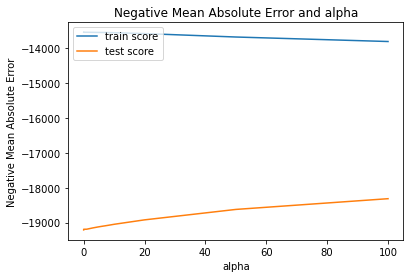

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
model_cv.best_params_

{'alpha': 500}

In [76]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [77]:
#Extracting the coefficients and model equation from lasso regression
lasso.coef_

array([-3.38243118e+03,  5.16062924e+03,  1.48507737e+04,  5.72479844e+03,
        1.43838620e+04,  0.00000000e+00,  1.66777587e+03, -2.31354000e+03,
        2.75667968e+04,  6.47725541e+03, -0.00000000e+00,  1.62236555e+03,
        2.37628743e+03, -3.63357189e+03, -3.99142317e+03,  0.00000000e+00,
        1.10939704e+03,  5.46201429e+03,  4.28695759e+02,  1.08306762e+03,
        0.00000000e+00, -7.11837487e+02,  2.54507811e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.58067050e+03, -0.00000000e+00,
        1.42234398e+03, -4.17419585e+02,  1.39600452e+03,  0.00000000e+00,
        0.00000000e+00, -8.46209969e+02,  1.40585389e+03, -0.00000000e+00,
        0.00000000e+00, -7.38880049e+01,  1.75744777e+03, -4.05781046e+02,
       -5.61079106e+02, -0.00000000e+00,  0.00000000e+00, -2.26753613e+03,
       -0.00000000e+00,  2.85722604e+03, -4.65566766e+02, -4.30084745e+02,
       -0.00000000e+00, -9.81875734e+02, -1.35099512e+02, -8.71900533e+02,
        6.61596695e+03,  

In [78]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print(list(zip(cols, model_parameters)))

[('constant', 180694.5), ('MSSubClass', -3382.4), ('LotArea', 5160.6), ('OverallQual', 14850.8), ('OverallCond', 5724.8), ('TotalBsmtSF', 14383.9), ('1stFlrSF', 0.0), ('2ndFlrSF', 1667.8), ('LowQualFinSF', -2313.5), ('GrLivArea', 27566.8), ('BsmtFullBath', 6477.3), ('BsmtHalfBath', -0.0), ('FullBath', 1622.4), ('HalfBath', 2376.3), ('BedroomAbvGr', -3633.6), ('KitchenAbvGr', -3991.4), ('TotRmsAbvGrd', 0.0), ('Fireplaces', 1109.4), ('GarageCars', 5462.0), ('GarageArea', 428.7), ('WoodDeckSF', 1083.1), ('OpenPorchSF', 0.0), ('EnclosedPorch', -711.8), ('PoolArea', 2545.1), ('MiscVal', 0.0), ('MoSold', -0.0), ('YrSold', 0.0), ('MSZoning_FV', 3580.7), ('MSZoning_RH', -0.0), ('MSZoning_RL', 1422.3), ('MSZoning_RM', -417.4), ('Street_Pave', 1396.0), ('LotShape_IR2', 0.0), ('LotShape_IR3', 0.0), ('LotShape_Reg', -846.2), ('LandContour_HLS', 1405.9), ('LandContour_Low', -0.0), ('LandContour_Lvl', 0.0), ('Utilities_NoSeWa', -73.9), ('LotConfig_CulDSac', 1757.4), ('LotConfig_FR2', -405.8), ('LotC

In [79]:
# model with optimal alpha
# lasso regression
lm1 = Lasso(alpha=500)
#lm1 = Lasso(alpha=0.001)
lm1.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm1.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#Calculate the R2 score
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score test:{}".format(r_square_score))

R Square score test:0.7265531794164254


From the R square value we see that the model
built using lasso regression can have 72.65% accuracy in its prediction capability. R-squared (R2) explains the proportion of variation in the outcome (Sale Price) that is explained by the predictor variables.

In [80]:
#AIC and BIC Calculation
n= 1452 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:813538332153.6619
AIC:29449.032369744746
BIC:29977.10208928322


Ridge Regression

Based on the predictor variables having high coefficients in Lasso Regression model, we will shortlist these and perform Ridge regression to further regularize the regression model

In [81]:
# split into X and y, X being selected from predictor variables found in Lasso model
X = housingDetails.loc[:, ['MSSubClass','LotArea','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                    'OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                    'ExterQual','Foundation','BsmtQual','BsmtExposure','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
                    '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                    'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
                    'GarageType','GarageFinish','GarageCars','GarageCond','WoodDeckSF','EnclosedPorch','PoolArea',
                    'SaleType','SaleCondition']]

y = housingDetails['SalePrice']

In [82]:
# creating dummy variables for categorical variables

# subset all categorical variables
housingDetails_categorical = X.select_dtypes(include=['object'])
housingDetails_categorical.head()

,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,SaleType,SaleCondition
0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001-2010,2001-2010,Gable,...,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,WD,Normal
1,FR2,Gtl,Others,Feedr,Norm,1Fam,1Story,1950-1975,1950-1975,Gable,...,Y,SBrkr,TA,Typ,Avg or below Fireplace,Attchd,RFn,TA,WD,Normal
2,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1991-2000,2001-2010,Gable,...,Y,SBrkr,Gd,Typ,Avg or below Fireplace,Attchd,RFn,TA,WD,Normal
3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1872-1925,1950-1975,Gable,...,Y,SBrkr,Gd,Typ,Above Avg Fireplace,Avg Garage,Unf,TA,WD,Abnorml
4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1991-2000,1991-2000,Gable,...,Y,SBrkr,Gd,Typ,Avg or below Fireplace,Attchd,RFn,TA,WD,Normal


In [83]:
# convert categorical variables into dummies
housingDetails_dummies = pd.get_dummies(housingDetails_categorical, drop_first=True)
housingDetails_dummies.head()

,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
# drop categorical variables 
X = X.drop(list(housingDetails_categorical.columns), axis=1)

In [85]:
# concat dummy variables with X
X = pd.concat([X, housingDetails_dummies], axis=1)

In [86]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010097,0.008748,0.003202,0.003922,0.0001,{'alpha': 0.0001},-21716.276609,-18965.714578,-19455.561192,-16658.865811,...,-19217.334934,1607.224680,27,-12677.135491,-13693.426166,-13582.837900,-14348.126115,-13400.174321,-13540.339999,537.127228
1,0.005130,0.006214,0.005183,0.005964,0.001,{'alpha': 0.001},-21716.137925,-18965.468675,-19455.471078,-16658.709903,...,-19217.216145,1607.236554,26,-12677.161242,-13693.411195,-13582.843943,-14348.130132,-13400.166569,-13540.342616,537.119807
2,0.009056,0.008818,0.004599,0.004587,0.01,{'alpha': 0.01},-21714.751231,-18963.027542,-19454.570797,-16657.161196,...,-19216.032780,1607.351729,25,-12677.417891,-13693.263875,-13582.904004,-14348.169584,-13400.089165,-13540.368904,537.045790
3,0.010267,0.003053,0.002545,0.003757,0.05,{'alpha': 0.05},-21708.956086,-18952.550492,-19450.588205,-16650.480700,...,-19210.937522,1607.906807,24,-12678.540078,-13692.716237,-13583.210514,-14348.370119,-13399.747700,-13540.516930,536.737220
4,0.005105,0.006622,0.006745,0.006522,0.1,{'alpha': 0.1},-21701.799437,-18940.226364,-19445.651951,-16642.502917,...,-19204.764141,1608.494572,23,-12679.901809,-13692.135814,-13583.589217,-14348.620773,-13399.467964,-13540.743115,536.363360


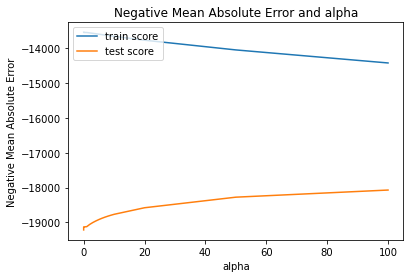

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [90]:
model_cv.best_params_

{'alpha': 100}

In [91]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#Predictor Variables from the Model built using Ridge Regression:
ridge.coef_

array([-2.89221495e+03,  5.81660320e+03,  1.23911748e+04,  5.14516483e+03,
        1.11156416e+04,  7.96513838e+03,  8.19454852e+03, -1.32874749e+03,
        1.25141849e+04,  6.63396350e+03,  5.12452401e+01,  3.33592840e+03,
        3.11722622e+03, -3.88421334e+03, -3.51149578e+03,  3.52304457e+03,
        3.24114890e+03,  4.95629669e+03,  2.70977008e+03,  1.25200128e+03,
        2.36461437e+02, -8.18299405e+02,  3.87073293e+03,  1.70033956e+02,
       -8.34917416e+01,  2.30242528e+02,  3.22374365e+03, -4.47151157e+02,
        1.63425341e+03, -6.45905463e+02,  2.12293652e+03, -9.53976498e+01,
        3.38913454e+02, -1.39118148e+03,  1.77445534e+03, -1.15895485e+03,
        5.12886564e+02, -4.39126743e+02,  2.00786059e+03, -1.27289305e+03,
       -1.03656432e+03, -6.67177265e+02,  1.13931534e+03, -3.06573695e+03,
       -1.72223608e+03,  3.09347585e+03, -1.88475626e+03, -2.66446797e+03,
        8.83135028e+01, -2.47488457e+03, -2.43605702e+03, -2.39306744e+03,
        6.40401149e+03,  

In [92]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
#Predictor Variables from the Model built using Ridge Regression:

[('constant', 180659.613),
 ('MSSubClass', -2892.215),
 ('LotArea', 5816.603),
 ('OverallQual', 12391.175),
 ('OverallCond', 5145.165),
 ('TotalBsmtSF', 11115.642),
 ('2ndFlrSF', 7965.138),
 ('LowQualFinSF', 8194.549),
 ('GrLivArea', -1328.747),
 ('BsmtFullBath', 12514.185),
 ('BsmtHalfBath', 6633.964),
 ('FullBath', 51.245),
 ('HalfBath', 3335.928),
 ('KitchenAbvGr', 3117.226),
 ('TotRmsAbvGrd', -3884.213),
 ('Fireplaces', -3511.496),
 ('GarageCars', 3523.045),
 ('WoodDeckSF', 3241.149),
 ('EnclosedPorch', 4956.297),
 ('PoolArea', 2709.77),
 ('LotConfig_CulDSac', 1252.001),
 ('LotConfig_FR2', 236.461),
 ('LotConfig_FR3', -818.299),
 ('LotConfig_Inside', 3870.733),
 ('LandSlope_Mod', 170.034),
 ('LandSlope_Sev', -83.492),
 ('Neighborhood_CollgCr', 230.243),
 ('Neighborhood_Crawfor', 3223.744),
 ('Neighborhood_Edwards', -447.151),
 ('Neighborhood_Gilbert', 1634.253),
 ('Neighborhood_IDOTRR', -645.905),
 ('Neighborhood_Mitchel', 2122.937),
 ('Neighborhood_NAmes', -95.398),
 ('Neighborhoo

In [93]:
# model with optimal alpha
# Ridge regression
lm2 = Ridge(alpha=100)
lm2.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm2.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#Calculate the R2 score
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score test:{}".format(r_square_score))

R Square score test:0.7447861452271713


In [94]:
#AIC and BIC Calculation
n= 1452 # n is equal to total datapoints on which model is built
k= 50 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:759292989076.5955
AIC:29248.836641013782
BIC:29512.871500783018


The optimal values of lambda or the hyerparameters for regularization of the regression models are;
    
    1. Lasso Regression, alpha = 500 
    2. Ridge Regression, alpha = 100
    
Based on both the Ridge and LAsso Models, the key predictor variables for predicting the Sale Price of Houses in Australia are as follows:

    'MSSubClass',    'LotArea',    'OverallQual',    'OverallCond',    'TotalBsmtSF',
    'BsmtFullBath',    'LowQualFinSF',    'BsmtHalfBath',    'YearBuilt_2001-2010', 'HeatingQC', 
    'SaleType',  'SaleCondition',  'GarageCond',  'Exterior1st',  'Neighborhood',
    'Fireplaces',  'Condition1',  'RoofStyle', 'Exterior2nd_Stone',  'KitchenQual', 
    'Functional_Mod','GarageType_BuiltIn','Heating_Wall','Heating'